<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/nn_pr_v1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [ ]:
# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [ ]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [ ]:
# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;


In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.out = []

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            if ((i+1) % 10 == 0) :
              print('epoch %d/%d   error=%f' % (i+1, epochs, err))

            if ((i+1) % 200 == 0) :
              x_pr = np.linspace(-10*math.pi, 10*math.pi, N)
              pred = net.predict(x_pr)
              self.out.append(pred)

In [ ]:
N = 2000
x = np.linspace(-4*math.pi, 4*math.pi, N)
y = np.zeros(N)
for i in range(len(x)):
  y[i] = math.cos(x[i])


In [ ]:
x_train = x
y_train = y


In [ ]:
# Network
net = Network()
net.add(FCLayer(1, 100))                
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 100))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 100))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 100))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 100))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 100))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(100, 1))                    
#net.add(ActivationLayer(tanh, tanh_prime))



In [ ]:
%%time
# train on samples
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1200, learning_rate=0.001)

epoch 10/1200   error=0.001193
epoch 20/1200   error=0.001426
epoch 30/1200   error=0.001760
epoch 40/1200   error=0.002505
epoch 50/1200   error=0.003004
epoch 60/1200   error=0.003570
epoch 70/1200   error=0.002489
epoch 80/1200   error=0.002607
epoch 90/1200   error=0.001393
epoch 100/1200   error=0.003983
epoch 110/1200   error=0.001618
epoch 120/1200   error=0.001505
epoch 130/1200   error=0.003583
epoch 140/1200   error=0.003290
epoch 150/1200   error=0.002561
epoch 160/1200   error=0.001811
epoch 170/1200   error=0.001292
epoch 180/1200   error=0.000451
epoch 190/1200   error=0.000707
epoch 200/1200   error=0.000663
epoch 210/1200   error=0.000075
epoch 220/1200   error=0.000391
epoch 230/1200   error=0.000516
epoch 240/1200   error=0.000393
epoch 250/1200   error=0.000291
epoch 260/1200   error=0.000059
epoch 270/1200   error=0.000671
epoch 280/1200   error=0.000094
epoch 290/1200   error=0.000664
epoch 300/1200   error=0.000671
epoch 310/1200   error=0.000215
epoch 320/1200   

In [ ]:
N = 3*N
x = np.linspace(-10*math.pi, 10*math.pi, N)
y = np.zeros(N)
for i in range(len(x)):
  y[i] = math.cos(x[i])

In [ ]:
# test on samples
out = net.predict(x)


In [ ]:
out3 = np.reshape(out, (N,))

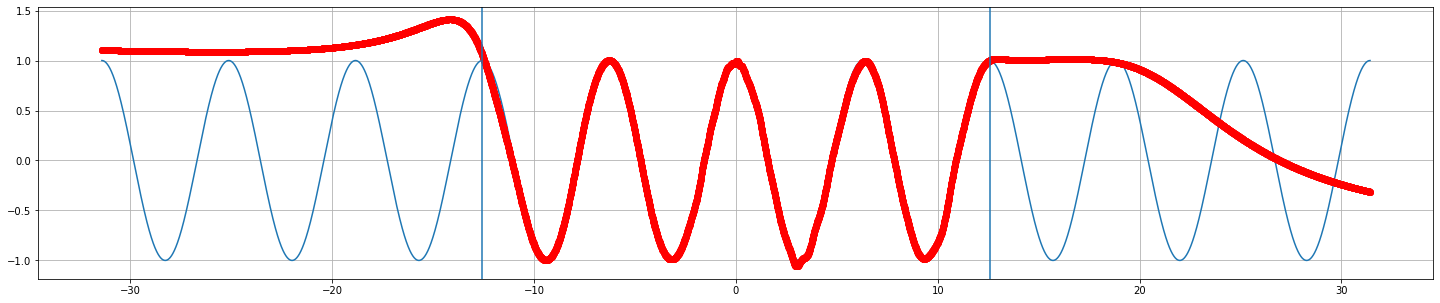

In [ ]:
# Настройка размеров подложки
plt.figure(figsize=(25, 6))
plt.grid(True)
plt.plot(x, y,)
plt.plot(x, out3, 'ro')
plt.axvline(x=4*math.pi)
plt.axvline(x=-4*math.pi)

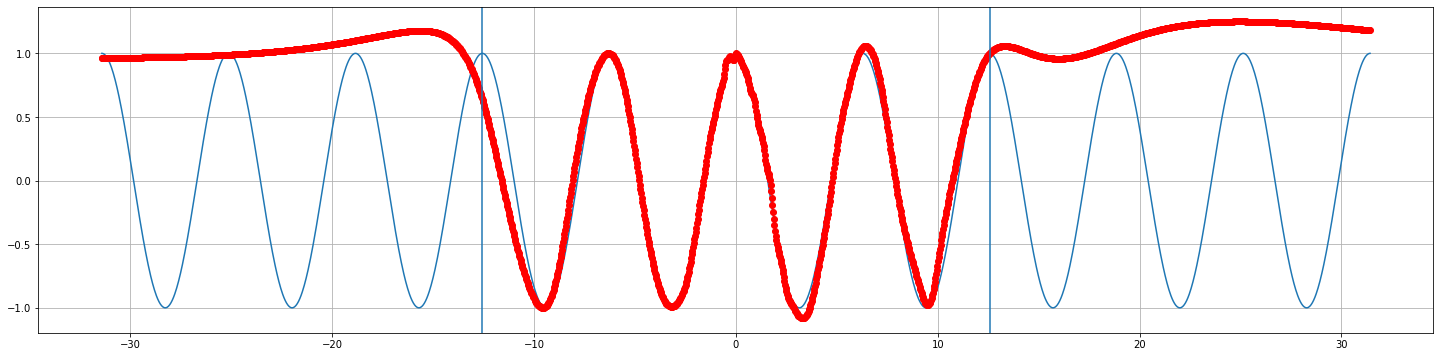

In [ ]:
N = 2000
x = np.linspace(-10*math.pi, 10*math.pi, N)
y = np.zeros(N)
for i in range(len(x)):
  y[i] = math.cos(x[i])

out = np.reshape(net.out[0], (N,))
plt.figure(figsize=(25, 6))
plt.grid(True)
plt.plot(x, y,)
plt.plot(x, out, 'ro')
plt.axvline(x=4*math.pi)
plt.axvline(x=-4*math.pi)